# Assignment 02 - Kodikara U. S. S. 210293K (ENTC)

## 1. Logistic Regression

In [9]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")

df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy() # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])

df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[[ 'species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop([ 'species', 'island', 'sex','class_encoded'] , axis =1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [7]:
y

0      0
1      0
2      0
4      0
5      0
      ..
215    1
216    1
217    1
218    1
219    1
Name: class_encoded, Length: 214, dtype: int32

In [8]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
215,55.8,19.8,207.0,4000.0
216,43.5,18.1,202.0,3400.0
217,49.6,18.2,193.0,3775.0
218,50.8,19.0,210.0,4100.0


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

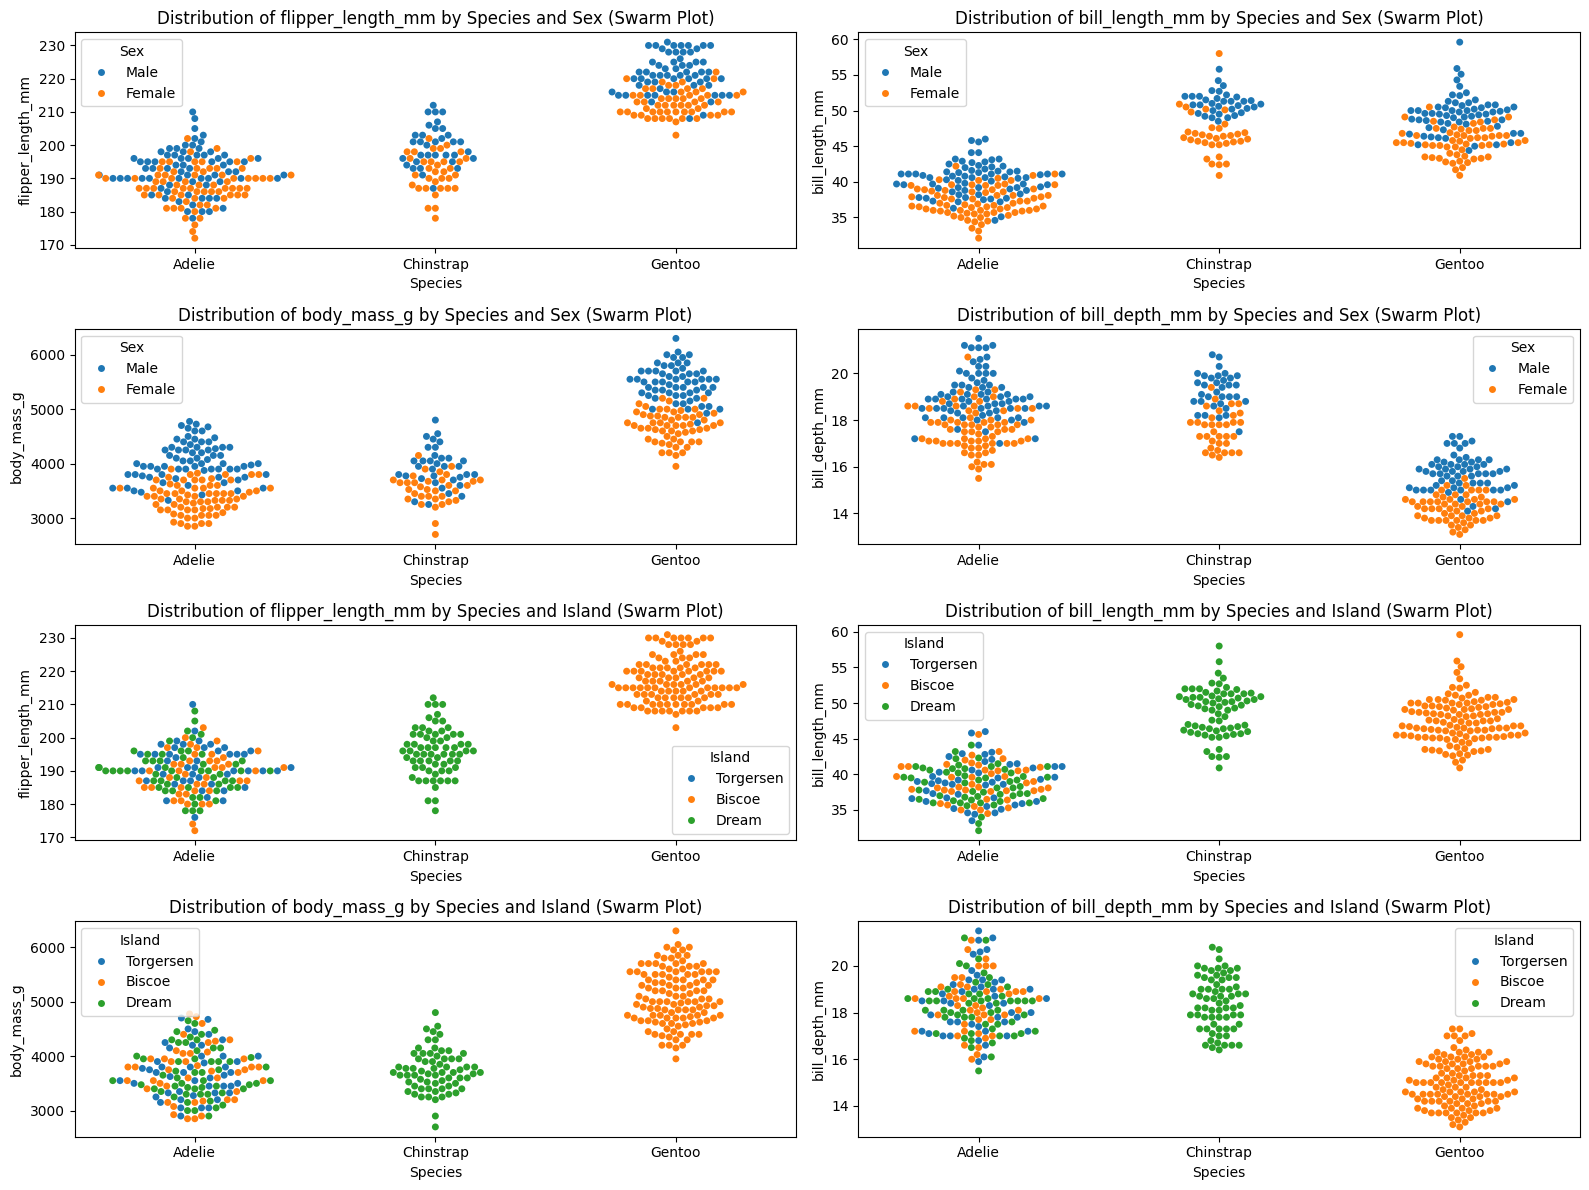

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Drop rows with missing values
df.dropna(inplace=True)

# Define the features to visualize
features = ['flipper_length_mm', 'bill_length_mm', 'body_mass_g', 'bill_depth_mm']

# Create a figure with subplots for Species vs. Sex
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)
    sns.swarmplot(data=df, x='species', y=feature, hue='sex')
    plt.title(f'Distribution of {feature} by Species and Sex (Swarm Plot)')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.legend(title='Sex')

# Add the 4th plot for Species vs. Island for bill_length_mm
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i+4)
    sns.swarmplot(data=df, x='species', y=feature , hue='island')
    plt.title(f'Distribution of {feature} by Species and Island (Swarm Plot)')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.legend(title='Island')

plt.tight_layout()
plt.show()


In [12]:
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.2 , random_state =42)
#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression( solver ='saga')
logreg.fit ( X_train , y_train )
# Predict on the testing data
y_pred = logreg.predict( X_test )
# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( "Coefficients : ", logreg.coef_ , "Intercept : ", logreg.intercept_ )

Accuracy : 0.5813953488372093
Coefficients :  [[ 2.75492000e-03 -8.22235633e-05  4.57578125e-04 -2.86266519e-04]] Intercept :  [-8.51475192e-06]


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.2 , random_state =42)
#Train the logistic regression model . Here we are using saga solver to learn weights .
logreg = LogisticRegression(solver='liblinear')
logreg.fit ( X_train , y_train )
# Predict on the testing data
y_pred = logreg.predict( X_test )
# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print ("Accuracy :", accuracy )
print ( "Coefficients : ", logreg.coef_ , "Intercept : ", logreg.intercept_ )

Accuracy : 1.0
Coefficients :  [[ 1.5966504  -1.4250108  -0.15238036 -0.00395099]] Intercept :  [-0.07554515]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# <<__ 1. Without Feature Scaling __>>

# 'liblinear' solver
logreg_liblinear = LogisticRegression(solver='liblinear')
logreg_liblinear.fit(X_train, y_train)
y_pred_liblinear = logreg_liblinear.predict(X_test)
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)

# 'saga' solver
logreg_saga = LogisticRegression(solver='saga')
logreg_saga.fit(X_train, y_train)
y_pred_saga = logreg_saga.predict(X_test)
accuracy_saga = accuracy_score(y_test, y_pred_saga)

print("Without Feature Scaling:")
print(f"Accuracy with 'liblinear': {accuracy_liblinear}")
print(f"Accuracy with 'saga': {accuracy_saga}")

# <<__ 2. With Feature Scaling __>>

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 'liblinear' solver
logreg_liblinear_scaled = LogisticRegression(solver='liblinear')
logreg_liblinear_scaled.fit(X_train_scaled, y_train)
y_pred_liblinear_scaled = logreg_liblinear_scaled.predict(X_test_scaled)
accuracy_liblinear_scaled = accuracy_score(y_test, y_pred_liblinear_scaled)

# 'saga' solver
logreg_saga_scaled = LogisticRegression(solver='saga')
logreg_saga_scaled.fit(X_train_scaled, y_train)
y_pred_saga_scaled = logreg_saga_scaled.predict(X_test_scaled)
accuracy_saga_scaled = accuracy_score(y_test, y_pred_saga_scaled)

print("\nWith Feature Scaling:")
print(f"Accuracy with 'liblinear': {accuracy_liblinear_scaled}")
print(f"Accuracy with 'saga': {accuracy_saga_scaled}")


Without Feature Scaling:
Accuracy with 'liblinear': 1.0
Accuracy with 'saga': 0.5813953488372093

With Feature Scaling:
Accuracy with 'liblinear': 0.9767441860465116
Accuracy with 'saga': 0.9767441860465116


c:\Users\Tuf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
from tabulate import tabulate

# Results without feature scaling
results_without_scaling = [
    ['Solver', 'Accuracy'],
    ['liblinear', accuracy_liblinear],
    ['saga', accuracy_saga]
]

print("Without Feature Scaling:")
print(tabulate(results_without_scaling, headers='firstrow', tablefmt='grid'))

# Results with feature scaling
results_with_scaling = [
    ['Solver', 'Accuracy'],
    ['liblinear', accuracy_liblinear_scaled],
    ['saga', accuracy_saga_scaled]
]

print("\nWith Feature Scaling:")
print(tabulate(results_with_scaling, headers='firstrow', tablefmt='grid'))


Without Feature Scaling:
+-----------+------------+
| Solver    |   Accuracy |
+===========+============+
| liblinear |   1        |
+-----------+------------+
| saga      |   0.581395 |
+-----------+------------+

With Feature Scaling:
+-----------+------------+
| Solver    |   Accuracy |
+===========+============+
| liblinear |   0.976744 |
+-----------+------------+
| saga      |   0.976744 |
+-----------+------------+


In [20]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset ("penguins")
df.dropna( inplace = True )
# Filter rows for 'Adelie ' and 'Chinstrap ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin( selected_classes )].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
df_filtered.head()
X = df_filtered.drop([ 'species', 'class_encoded'] , axis =1)
y = df_filtered['class_encoded'] # Target variable
X.head()
print(X.dtypes)  # Check data types of columns
print(X.head())  # Check the first few rows of the DataFrame
# Split the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size =0.2 , random_state =42)
logreg = LogisticRegression( solver ='saga')
logreg.fit( X_train , y_train )
# Predict on the testing data
y_pred = logreg.predict( X_test )
# Evaluate the model
accuracy = accuracy_score( y_test , y_pred )
print(" Accuracy :", accuracy )
print( logreg.coef_ , logreg.intercept_ )

island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
      island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g   
0  Torgersen            39.1           18.7              181.0       3750.0  \
1  Torgersen            39.5           17.4              186.0       3800.0   
2  Torgersen            40.3           18.0              195.0       3250.0   
4  Torgersen            36.7           19.3              193.0       3450.0   
5  Torgersen            39.3           20.6              190.0       3650.0   

      sex  
0    Male  
1  Female  
2  Female  
4  Female  
5    Male  


ValueError: could not convert string to float: 'Dream'

In [19]:
print(X.dtypes)  # Check data types of columns
print(X.head())  # Check the first few rows of the DataFrame

island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
      island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g   
0  Torgersen            39.1           18.7              181.0       3750.0  \
1  Torgersen            39.5           17.4              186.0       3800.0   
2  Torgersen            40.3           18.0              195.0       3250.0   
4  Torgersen            36.7           19.3              193.0       3450.0   
5  Torgersen            39.3           20.6              190.0       3650.0   

      sex  
0    Male  
1  Female  
2  Female  
4  Female  
5    Male  
